# Imp Stuff To Run

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, time, json, pprint, ast


# MACHINE LEARNING
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

# - MODELS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor, DummyClassifier

# - METRICS
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from yellowbrick.classifier import ROCAUC

# RECOMMENDER SYSTEM
from scipy.sparse import csr_matrix

# CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU

## Data PreProcessing

In [3]:
FILE_PATH = '/content/drive/MyDrive/ML Group Project/'
df = pd.read_excel(FILE_PATH + 'extracted_data/track_features_large.xlsx')

# down = 'track_features_meme_ghazal'
# hig_low = f'{down}.xlsx'

# df = pd.read_excel(FILE_PATH + 'feature_plots/' + hig_low)

df['Playlist URI'].unique()

array(['Country', 'LoFi', 'Rock'], dtype=object)

In [5]:
ast.literal_eval(df['Audio Features'][0])

[{'danceability': 0.369,
  'energy': 0.192,
  'key': 4,
  'loudness': -12.151,
  'mode': 0,
  'speechiness': 0.04,
  'acousticness': 0.555,
  'instrumentalness': 8.35e-06,
  'liveness': 0.0954,
  'valence': 0.148,
  'tempo': 175.212,
  'type': 'audio_features',
  'id': '3WMj8moIAXJhHsyLaqIIHI',
  'uri': 'spotify:track:3WMj8moIAXJhHsyLaqIIHI',
  'track_href': 'https://api.spotify.com/v1/tracks/3WMj8moIAXJhHsyLaqIIHI',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3WMj8moIAXJhHsyLaqIIHI',
  'duration_ms': 228013,
  'time_signature': 3}]

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Playlist URI'] = le.fit_transform(df['Playlist URI'])
df['Playlist URI'].value_counts()

1    823
0    546
2    517
Name: Playlist URI, dtype: int64

In [7]:
IMP_FEATURES = ["playlist_uri", 'key', 'loudness', 'tempo', 'duration_ms']

In [8]:
import datetime
date = datetime.datetime.now()
date = date.strftime('%d-%m')

In [9]:
import pandas as pd

store = {
    "key": [],
    "loudness": [],
    "tempo": [],
    "duration_ms": [],
    "playlist_uri": [],
}

save_df = pd.DataFrame.from_dict(store)
# save_df.to_csv(f'{FILE_PATH}feature_plots/track_features_meme_ghazal.csv', mode='w', index=False, header=True)
save_df.to_csv(f'{FILE_PATH}extracted_data/training_data_large_{date}.csv', mode='w', index=False, header=True)

In [10]:
features = {}


for audio_features, playlist in zip(df['Audio Features'], df['Playlist URI']):
  features = ast.literal_eval(audio_features)
  features[0]["playlist_uri"] = playlist
  for key in list(features[0].keys()):
    if key not in IMP_FEATURES:
      del features[0][key]
    else:
      features[0][key] = [features[0][key]]
  
  df = pd.DataFrame.from_dict(features[0])
  df.to_csv(f'{FILE_PATH}extracted_data/training_data_large_{date}.csv', mode='a', index=False, header=False)

df = pd.read_csv(f'{FILE_PATH}extracted_data/training_data_large_{date}.csv')
df = df.sample(frac = 1)
# df['duration_ms'] = df['duration_ms'] / 1000
# df.rename(columns = {'duration_ms':'sampling_seconds'}, inplace = True)
df.to_csv(f'{FILE_PATH}extracted_data/track_features_large_{date}.csv', mode='w', index=False, header=True)

## Normalization Functions

### Main Function

In [11]:
def normalize_standardize(data=None, func=None):
  return func(data)

#### Sub Functions

In [12]:
def z_score(x):
  return (x - x.mean())/(x.std())

In [13]:
def gaussian(x):
  return np.exp(-pow(x,2))

In [14]:
def minmax(x):
	return (x - x.min()) / (x.max() - x.min())

In [15]:
def log_scale(x):
  return np.log(x)

In [16]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [17]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

## Consolidate DataFrames

In [18]:
songs_000 = pd.read_csv("/content/drive/MyDrive/ML Group Project/000_Songs.csv")
songs_001 = pd.read_csv("/content/drive/MyDrive/ML Group Project/001_Songs.csv")
songs_002 = pd.read_csv("/content/drive/MyDrive/ML Group Project/002_Songs.csv")
songs_003 = pd.read_csv("/content/drive/MyDrive/ML Group Project/003_Songs.csv")
songs_004 = pd.read_csv("/content/drive/MyDrive/ML Group Project/004_Songs.csv")
songs_005 = pd.read_csv("/content/drive/MyDrive/ML Group Project/005_Songs.csv")
songs_006 = pd.read_csv("/content/drive/MyDrive/ML Group Project/006_Songs.csv")
songs_007 = pd.read_csv("/content/drive/MyDrive/ML Group Project/007_Songs.csv")
songs_008 = pd.read_csv("/content/drive/MyDrive/ML Group Project/008_Songs.csv")

track_data = pd.read_csv("/content/drive/MyDrive/ML Group Project/raw_tracks.csv")


# APPENDING DATA FROM FILES 000 AND 001
songs = songs_000.append(songs_001).append(songs_002).append(songs_003).append(songs_004).append(songs_005).append(songs_006).append(songs_007).append(songs_008)

# USING THE TRACK DATA JOINING THE audio_file AND track_id TO THE songs dataset
consolidated = pd.merge(songs, track_data[['track_id', 'album_title', 
                                           'track_title']], how = 'left', 
                                           left_on = 'audio_file', 
                                           right_on = 'track_id')

# CONVERTING SECONDS TO MILLISECONDS CASTED TO INT
consolidated['sampling_seconds'] = consolidated['sampling_seconds']*1000
consolidated['sampling_seconds'].astype('int')

0        65860
1       204382
2       274259
3       288835
4       105404
         ...  
2062    420048
2063    150857
2064     10240
2065    111908
2066    189361
Name: sampling_seconds, Length: 2067, dtype: int64

## Read Spotify Playlist Data

In [19]:
playlist_train = pd.read_csv(f"{FILE_PATH}extracted_data/training_data_large_{date}.csv")

## Normalizing / Standardizing the training data

In [20]:
FEATURES = ['duration_ms','key', 'loudness', 'tempo']
NORM_STAND = z_score

In [21]:
for f in FEATURES:
  playlist_train[f] = normalize_standardize(playlist_train[f], NORM_STAND)

## Create Polynomials

In [22]:
def create_polynomialFeatures(data, degree=2):
  polyModel = PolynomialFeatures(degree=degree)
  return polyModel.fit_transform(data)

## Metrics

In [23]:
def print_metrics(y_test, y_pred):
    print("-"*10+"CONFUSION-MATRIX"+"-"*10)
    print(confusion_matrix(y_test, y_pred))

    print("-"*10+"CLASSIFICATION-REPORT"+"-"*10)
    print(classification_report(y_test, y_pred))

In [24]:
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest, ax=None):
  # Creating visualization with the readable labels
  fig, ax = plt.subplots()
  visualizer = ROCAUC(model, encoder={0: '0', 
                                      1: '1', 
                                      2: '2', 
                                      3: '3'}, macro=False, micro=False, ax=ax)
                                      
  # Fitting to the training data first then scoring with the test data                                    
  visualizer.fit(xtrain, ytrain)
  visualizer.score(xtest, ytest)
  visualizer.finalize(expressive=True)
  ax.set_ylim([-0.01, 1.01])
  ax.set_xlim([-0.01, 1.01])
  
  return visualizer

# KNN Classifier

In [25]:
model = KNeighborsClassifier(metric='cosine')

X = playlist_train[FEATURES]
y = playlist_train['playlist_uri']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)

----------CONFUSION-MATRIX----------
[[ 53  22  33]
 [ 13 141   4]
 [ 43  10  59]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       108
           1       0.82      0.89      0.85       158
           2       0.61      0.53      0.57       112

    accuracy                           0.67       378
   macro avg       0.64      0.64      0.64       378
weighted avg       0.66      0.67      0.66       378



In [26]:
y_pred = model.predict(X_train)
print_metrics(y_train, y_pred)

----------CONFUSION-MATRIX----------
[[291  67  80]
 [ 43 605  17]
 [ 83  36 286]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       438
           1       0.85      0.91      0.88       665
           2       0.75      0.71      0.73       405

    accuracy                           0.78      1508
   macro avg       0.77      0.76      0.76      1508
weighted avg       0.78      0.78      0.78      1508



In [27]:
test = consolidated.rename(columns = {'sampling_seconds':'duration_ms', 'bpm':'tempo'})

new_pred = test[FEATURES]

for f in FEATURES:
  new_pred[f] = normalize_standardize(new_pred[f], NORM_STAND)

pred_playlist = model.predict(new_pred)

<ipython-input-27-6063daa6bc9b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pred[f] = normalize_standardize(new_pred[f], NORM_STAND)


In [28]:
new = pd.DataFrame(pred_playlist)
new.value_counts()

1    1023
0     673
2     371
dtype: int64

### Baseline Predictor

In [29]:
dmfr = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dmun = DummyClassifier(strategy='uniform').fit(X_train, y_train)
dstrut = DummyClassifier(strategy='stratified').fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


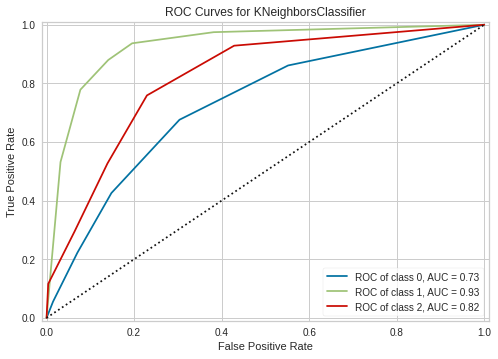

In [30]:
plot_ROC_curve(model, X_train, y_train, X_test, y_test);

In [31]:
print("\n\nDUMMY CLASSIFIER - Stratified")
print(dstrut.score(X_test, y_test))
y_pred = dstrut.predict(X_test)
print_metrics(y_test, y_pred)



DUMMY CLASSIFIER - Stratified
0.36772486772486773
----------CONFUSION-MATRIX----------
[[31 44 33]
 [40 73 45]
 [31 45 36]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.30      0.29      0.30       108
           1       0.45      0.46      0.46       158
           2       0.32      0.32      0.32       112

    accuracy                           0.37       378
   macro avg       0.36      0.36      0.36       378
weighted avg       0.37      0.37      0.37       378



# Logistic Regression Recommendation

In [32]:
X = playlist_train[FEATURES]
y = playlist_train['playlist_uri']

model = LogisticRegression()

X_poly = create_polynomialFeatures(X, degree=2)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state = 1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)

----------CONFUSION-MATRIX----------
[[ 58  21  29]
 [ 12 143   3]
 [ 39   7  66]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.53      0.54      0.53       108
           1       0.84      0.91      0.87       158
           2       0.67      0.59      0.63       112

    accuracy                           0.71       378
   macro avg       0.68      0.68      0.68       378
weighted avg       0.70      0.71      0.70       378



In [33]:
y_pred = model.predict(X_train)
print_metrics(y_train, y_pred)

----------CONFUSION-MATRIX----------
[[247  77 114]
 [ 70 579  16]
 [104  29 272]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.59      0.56      0.58       438
           1       0.85      0.87      0.86       665
           2       0.68      0.67      0.67       405

    accuracy                           0.73      1508
   macro avg       0.70      0.70      0.70      1508
weighted avg       0.72      0.73      0.73      1508



In [34]:
model.coef_

array([[-1.83383373e-03,  5.23470043e-01,  2.71542499e-02,
         2.50000702e-01,  3.75422279e-02, -5.68204987e-01,
        -4.82318752e-02,  1.82684664e-02,  2.71593485e-02,
        -6.07580794e-02,  1.72533726e-01,  1.02317665e-02,
        -1.09225985e-02,  6.23066369e-05,  1.36172895e-01],
       [-8.38675968e-04, -3.32092073e-01, -5.03700626e-02,
        -2.55821147e+00, -2.98535363e-01,  3.83882223e-01,
        -9.86958682e-02, -8.75855355e-02,  1.13367242e-01,
        -2.66575988e-02, -1.45906680e-01, -8.77293831e-02,
        -3.69946711e-01, -1.76473298e-01,  9.52550641e-02],
       [ 2.67250970e-03, -1.91377970e-01,  2.32158127e-02,
         2.30821076e+00,  2.60993135e-01,  1.84322764e-01,
         1.46927743e-01,  6.93170690e-02, -1.40526591e-01,
         8.74156782e-02, -2.66270461e-02,  7.74976166e-02,
         3.80869309e-01,  1.76410991e-01, -2.31427959e-01]])

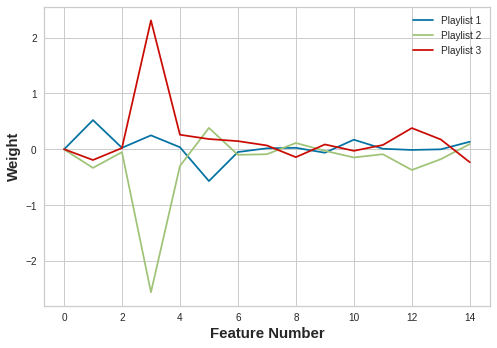

In [35]:
x_axis = np.arange(0,15)
y_axis_1 = model.coef_[0]
y_axis_2 = model.coef_[1]
y_axis_3 = model.coef_[2]

plt.plot(x_axis, y_axis_1, label = 'Playlist 1')
plt.plot(x_axis, y_axis_2, label = 'Playlist 2')
plt.plot(x_axis, y_axis_3, label = 'Playlist 3')

plt.xlabel('Feature Number', fontweight ='bold', fontsize = 15)
plt.ylabel('Weight', fontweight ='bold', fontsize = 15)

plt.legend()

In [36]:
test = consolidated.rename(columns = {'sampling_seconds':'duration_ms', 'bpm':'tempo'})

new_pred = test[FEATURES]

for f in FEATURES:
  new_pred[f] = normalize_standardize(new_pred[f], NORM_STAND)

new_pred_poly = create_polynomialFeatures(new_pred, degree=2)
pred_playlist = model.predict(new_pred_poly)

<ipython-input-36-4eb1e254dfd9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pred[f] = normalize_standardize(new_pred[f], NORM_STAND)


In [37]:
new = pd.DataFrame(pred_playlist)
new.value_counts()

1    1053
0     528
2     486
dtype: int64

### Baseline Predictor

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f987edd2fd0>,
       encoder={0: '0', 1: '1', 2: '2', 3: '3'}, estimator=LogisticRegression(),
       macro=False, micro=False)

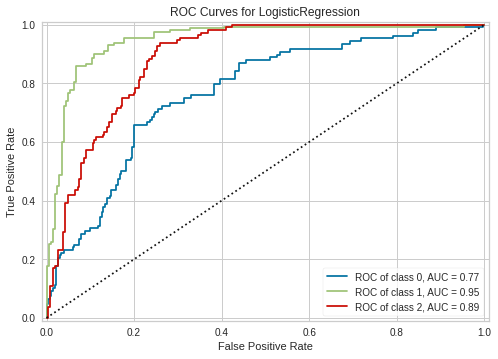

In [38]:
plot_ROC_curve(model, X_train, y_train, X_test, y_test)

In [39]:
dmfr = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dmun = DummyClassifier(strategy='uniform').fit(X_train, y_train)

In [40]:
print("\n\nDUMMY CLASSIFIER - frequent")
print(dmfr.score(X_test, y_test))
y_pred = dmfr.predict(X_test)
print_metrics(y_test, y_pred)



DUMMY CLASSIFIER - frequent
0.41798941798941797
----------CONFUSION-MATRIX----------
[[  0 108   0]
 [  0 158   0]
 [  0 112   0]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.42      1.00      0.59       158
           2       0.00      0.00      0.00       112

    accuracy                           0.42       378
   macro avg       0.14      0.33      0.20       378
weighted avg       0.17      0.42      0.25       378



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print("\n\nDUMMY CLASSIFIER - Stratified")
print(dstrut.score(X_test, y_test))
y_pred = dstrut.predict(X_test)
print_metrics(y_test, y_pred)



DUMMY CLASSIFIER - Stratified
0.35185185185185186
----------CONFUSION-MATRIX----------
[[36 50 22]
 [48 63 47]
 [32 50 30]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.31      0.33      0.32       108
           1       0.39      0.40      0.39       158
           2       0.30      0.27      0.28       112

    accuracy                           0.34       378
   macro avg       0.33      0.33      0.33       378
weighted avg       0.34      0.34      0.34       378



# MLP Classifier

In [42]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(200, 150,100,50), max_iter=30,activation = 'relu',
                           solver='adam',random_state=1, alpha = 0.001)

X = playlist_train[FEATURES]
y = playlist_train['playlist_uri']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [43]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
print_metrics(y_test, y_pred)

----------CONFUSION-MATRIX----------
[[ 56  27  25]
 [  8 147   3]
 [ 38   8  66]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       108
           1       0.81      0.93      0.86       158
           2       0.70      0.59      0.64       112

    accuracy                           0.71       378
   macro avg       0.69      0.68      0.68       378
weighted avg       0.70      0.71      0.70       378



In [45]:
y_pred = classifier.predict(X_train)
print_metrics(y_train, y_pred)

----------CONFUSION-MATRIX----------
[[264  86  88]
 [ 40 615  10]
 [102  31 272]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       438
           1       0.84      0.92      0.88       665
           2       0.74      0.67      0.70       405

    accuracy                           0.76      1508
   macro avg       0.74      0.73      0.74      1508
weighted avg       0.76      0.76      0.76      1508



In [46]:
test = consolidated.rename(columns = {'sampling_seconds':'duration_ms', 'bpm':'tempo'})

new_pred = test[FEATURES]

for f in FEATURES:
  new_pred[f] = normalize_standardize(new_pred[f], NORM_STAND)

pred_playlist = classifier.predict(new_pred)

<ipython-input-46-7c0871dcc0a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pred[f] = normalize_standardize(new_pred[f], NORM_STAND)


In [47]:
new = pd.DataFrame(pred_playlist)
new.value_counts()

1    1124
2     487
0     456
dtype: int64

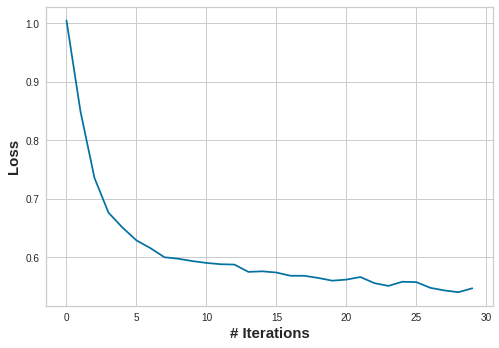

In [48]:

x_axis = np.arange(len(classifier.loss_curve_))
y_axis = classifier.loss_curve_

plt.plot(x_axis, y_axis)

plt.xlabel('# Iterations', fontweight ='bold', fontsize = 15)
plt.ylabel('Loss', fontweight ='bold', fontsize = 15)

plt.legend()

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692:

<function matplotlib.pyplot.show(*args, **kw)>

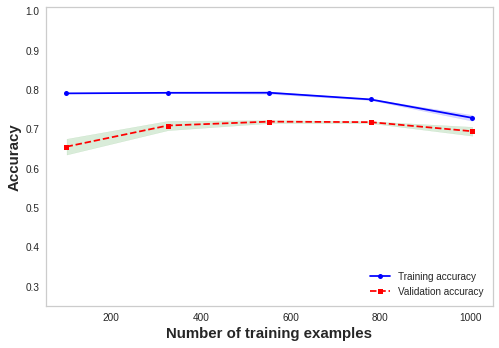

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = MLPClassifier(hidden_layer_sizes=(200, 150,100,50), max_iter=30,
                                                                                  activation = 'relu',solver='adam',random_state=1),
                                                        X = X_train, y = y_train, cv = 3, train_sizes = np.linspace(0.1,1,5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color = "blue", marker = 'o',
         markersize = 5,label  ='Training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std, 
                 train_mean - train_std,
                 alpha=0.15, color = 'blue')

plt.plot(train_sizes, test_mean, 
         color='red', linestyle = '--',
         marker = 's',markersize = 5, 
         label = 'Validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std, 
                 test_mean - test_std,
                 alpha=0.15, color = 'green')
    

plt.grid()
plt.xlabel('Number of training examples',fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy',fontweight ='bold', fontsize = 15)
plt.legend(loc = 'lower right')
plt.ylim([0.25, 1.01])
plt.show

### Baseline Predictor

In [50]:
dmfr = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dmun = DummyClassifier(strategy='uniform').fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f987edbbf40>,
       encoder={0: '0', 1: '1', 2: '2', 3: '3'},
       estimator=MLPClassifier(alpha=0.001,
                               hidden_layer_sizes=(200, 150, 100, 50),
                               max_iter=30, random_state=1),
       macro=False, micro=False)

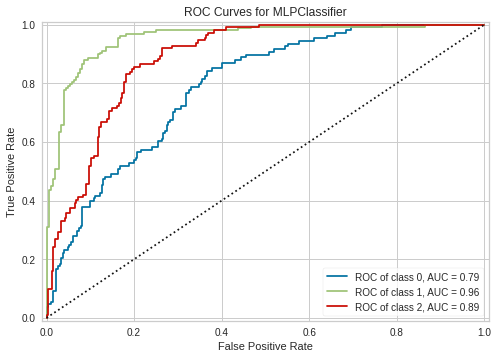

In [51]:
plot_ROC_curve(classifier, X_train, y_train, X_test, y_test)

In [52]:
print("\n\nDUMMY CLASSIFIER - frequent")
print(dmfr.score(X_test, y_test))
y_pred = dmfr.predict(X_test)
print_metrics(y_test, y_pred)



DUMMY CLASSIFIER - frequent
0.41798941798941797
----------CONFUSION-MATRIX----------
[[  0 108   0]
 [  0 158   0]
 [  0 112   0]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.42      1.00      0.59       158
           2       0.00      0.00      0.00       112

    accuracy                           0.42       378
   macro avg       0.14      0.33      0.20       378
weighted avg       0.17      0.42      0.25       378



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print("\n\nDUMMY CLASSIFIER - uniform")
print(dmun.score(X_test, y_test))
ypred = dmun.predict(X_test)
print_metrics(y_test, y_pred)



DUMMY CLASSIFIER - uniform
0.3386243386243386
----------CONFUSION-MATRIX----------
[[  0 108   0]
 [  0 158   0]
 [  0 112   0]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.42      1.00      0.59       158
           2       0.00      0.00      0.00       112

    accuracy                           0.42       378
   macro avg       0.14      0.33      0.20       378
weighted avg       0.17      0.42      0.25       378



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import GaussianNB

X = playlist_train[FEATURES]
y = playlist_train['playlist_uri']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print_metrics(y_test, y_pred)

----------CONFUSION-MATRIX----------
[[ 45  19  44]
 [ 21 134   3]
 [ 26   5  81]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       108
           1       0.85      0.85      0.85       158
           2       0.63      0.72      0.68       112

    accuracy                           0.69       378
   macro avg       0.66      0.66      0.66       378
weighted avg       0.68      0.69      0.68       378



In [55]:
y_pred = gnb.predict(X_train)
print_metrics(y_train, y_pred)

----------CONFUSION-MATRIX----------
[[184  57 197]
 [108 532  25]
 [ 65  22 318]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.52      0.42      0.46       438
           1       0.87      0.80      0.83       665
           2       0.59      0.79      0.67       405

    accuracy                           0.69      1508
   macro avg       0.66      0.67      0.66      1508
weighted avg       0.69      0.69      0.68      1508



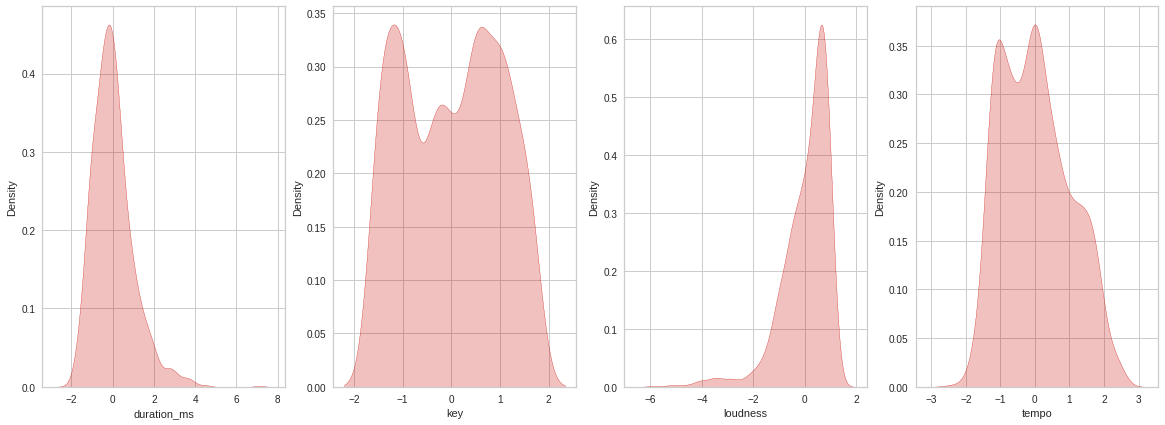

In [57]:
import seaborn as sns
fig, axs = plt.subplots(1, 4, figsize=(20,7))
sns.kdeplot(X_train['duration_ms'], shade=True, color="r", ax = axs[0])
sns.kdeplot(X_train['key'], shade=True, color="r", ax = axs[1])
sns.kdeplot(X_train['loudness'], shade=True, color="r", ax = axs[2])
sns.kdeplot(X_train['tempo'], shade=True, color="r", ax = axs[3])

In [58]:
gnb.class_prior_

array([0.29045093, 0.44098143, 0.26856764])

### Baseline Predictor

In [67]:
dmfr = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dstrut = DummyClassifier(strategy='stratified').fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f987b9e1be0>,
       encoder={0: '0', 1: '1', 2: '2', 3: '3'}, estimator=GaussianNB(),
       macro=False, micro=False)

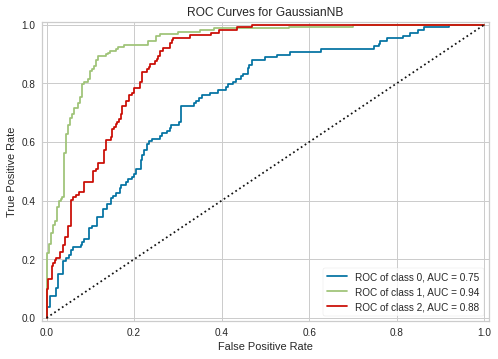

In [68]:
plot_ROC_curve(gnb, X_train, y_train, X_test, y_test)

In [69]:
print("\n\nDUMMY CLASSIFIER - frequent")
print(dmfr.score(X_test, y_test))
y_pred = dmfr.predict(X_test)
print_metrics(y_test, y_pred)



DUMMY CLASSIFIER - frequent
0.41798941798941797
----------CONFUSION-MATRIX----------
[[  0 108   0]
 [  0 158   0]
 [  0 112   0]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.42      1.00      0.59       158
           2       0.00      0.00      0.00       112

    accuracy                           0.42       378
   macro avg       0.14      0.33      0.20       378
weighted avg       0.17      0.42      0.25       378



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print("\n\nDUMMY CLASSIFIER - Stratified")
print(dstrut.score(X_test, y_test))
ypred = dstrut.predict(X_test)
print_metrics(y_test, y_pred)



DUMMY CLASSIFIER - Stratified
0.3386243386243386
----------CONFUSION-MATRIX----------
[[  0 108   0]
 [  0 158   0]
 [  0 112   0]]
----------CLASSIFICATION-REPORT----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.42      1.00      0.59       158
           2       0.00      0.00      0.00       112

    accuracy                           0.42       378
   macro avg       0.14      0.33      0.20       378
weighted avg       0.17      0.42      0.25       378



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
